In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from itertools import chain

In [3]:
figsize(10,10)

In [4]:
N = 3

Vertices of the inner polygon
- evenly spaced points on unit circle
- in clockwise order

In [5]:
t = linspace(2*pi, 2* (pi / N), N)
x = cos(t)
y = sin(t)

In [6]:
t_circle = linspace(0, 2*pi, 128)

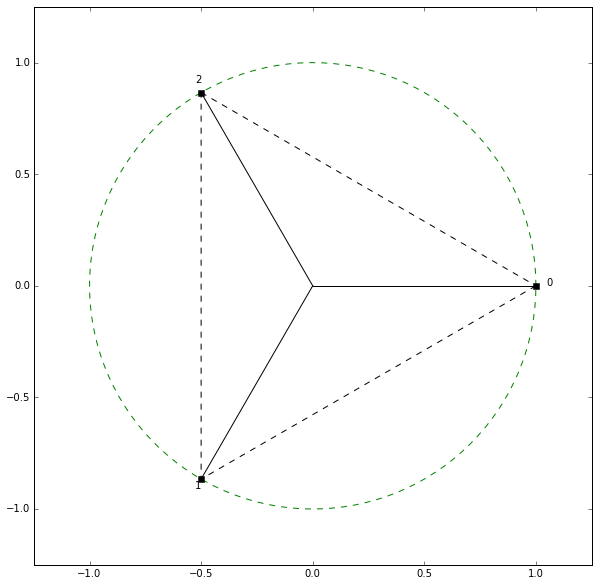

In [7]:
plot(cos(t_circle), sin(t_circle), 'g--')
for j, (px, py) in enumerate(zip(x,y)):
    text(1.05*px, 1.05*py, str(j))
    plot([0, px], [0, py], 'k-')
plot(x,y, 'ks--')
plot(x[[-1, 0]], y[[-1, 0]], 'k--')
axis('equal')
ylim(xlim([-1.25, 1.25]))
None

Outward normals for each edge
- because our points are on the unit circle, outward normal for the edge is the angle halfway between the points

In [8]:
nts = linspace((2*pi)-(pi/N), pi/N, N)

(-1.25, 1.25)

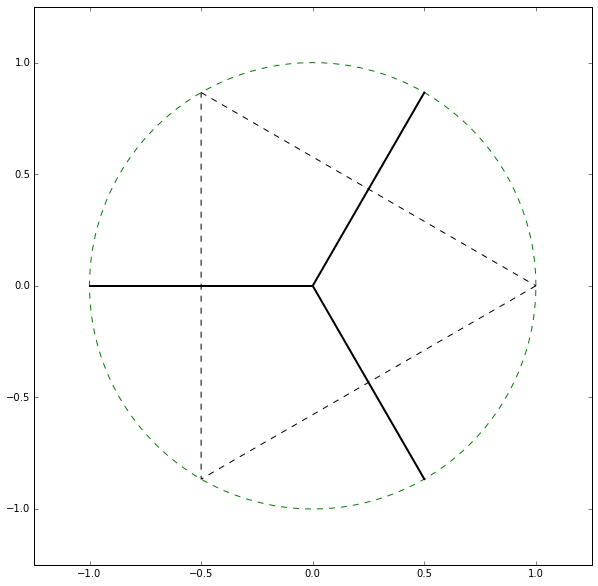

In [9]:
plot(cos(t_circle), sin(t_circle), 'g--')
plot(x,y, 'k--')
plot(x[[-1, 0]], y[[-1, 0]], 'k--')
for normal_angle in nts:
    plot([0, cos(normal_angle)], [0, sin(normal_angle)], 'k-', linewidth=2)
axis('equal')
ylim(xlim([-1.25, 1.25]))

In [10]:
def emit_line(x,y):
    for _x, _y in zip(x,y):
        yield (_x, _y)

In [11]:
def grow_tri(x, y, nt, depth, shrink = False):
    if depth <= 0:
        return emit_line(x, y)
    else:
        xx = linspace(x[0], x[1], 4)[[0, 1, 2, 3]]
        yy = linspace(y[0], y[1], 4)[[0, 1, 2, 3]]  
        if shrink:
            xx = linspace(x[0], x[1], 20)[[0, 8, 11, 19]]
            yy = linspace(y[0], y[1], 20)[[0, 8, 11, 19]]
        # dropping the vertical on an equilateral triangle gives a 30/60/90 triangle.... want to go sin(60)
        d = sin(pi/3) * norm([diff(xx[1:3]), diff(yy[1:3])])  
        xm = mean(x) + (d * cos(nt))
        ym = mean(y) + (d * sin(nt))
        offset = 1 #randint(1,3)
        return chain(grow_tri(xx[:2], yy[:2], nt, depth - offset),
                     grow_tri([xx[1], xm], [yy[1], ym], nt + pi/3, depth - offset),
                     grow_tri([xm, xx[2]], [ym, yy[2]], nt - pi/3, depth - offset),
                     grow_tri(xx[2:], yy[2:], nt, depth - offset))    

In [12]:
def draw_triangle_fractal(depth, plot_fn):
    N = 3
    t = linspace(2*pi, 2* (pi / N), N)
    x = cos(t)
    y = sin(t)
    nts = linspace((2*pi)-(pi/N), pi/N, N)
    xx, yy = zip(*chain(
        grow_tri([x[N-1], x[0]], [y[N-1], y[0]], nts[N-1], depth),
        *(grow_tri(x[j:j+2], y[j:j+2], nts[j], depth) for j in range(N-1))))
#     print(xx)
    plot_fn(xx, yy, 'k-')
    axis('equal')
    axis('off')

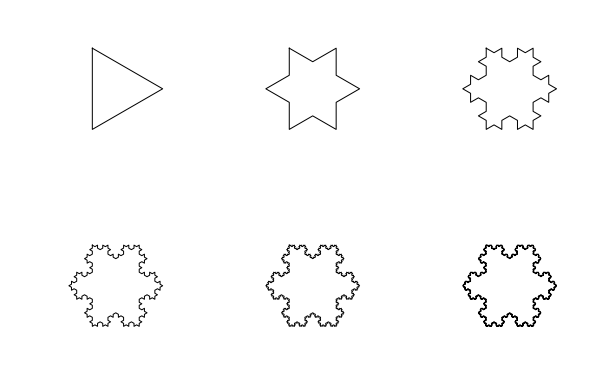

In [13]:
for j in range(6):
    subplot(3,3,1+j)
    draw_triangle_fractal(j, plot)
    ylim(xlim([-1.75, 1.75]))

In [14]:
#functions = [grow_tri, grow_box, grow_pentagon, grow_hexagon]
# shuffle(functions)

def draw_line(x,y, nt, depth):
    if depth <= 0:
        return emit_line(x,y)
    else: 
        return grow_pentagon(x, y, nt, depth)
    # Some other options
#     elif depth == 1:
#         return grow_tri(x, y, nt, depth)
#     elif depth == 2: 
#         return grow_box(x, y, nt, depth)
#     elif depth == 3:
#         return grow_pentagon(x, y, nt, depth)
#     elif depth == 4:
#         return grow_hexagon(x, y, nt, depth)
#     else:
#         return emit_line(x, y)

In [15]:
def grow_hexagon(x, y, nt, depth):
        xx = linspace(x[0], x[1], 7)[[0, 1, 5, 6]]
        yy = linspace(y[0], y[1], 7)[[0, 1, 5, 6]] 
#         xx = linspace(x[0], x[1], 6)[[0, 1, 4, 5]]
#         yy = linspace(y[0], y[1], 6)[[0, 1, 4, 5]] 
#         xx = linspace(x[0], x[1], 4)[[0, 1, 2, 3]]
#         yy = linspace(y[0], y[1], 4)[[0, 1, 2, 3]]         
        d = norm([diff(xx[1:3]), diff(yy[1:3])])
        r = (d / 2) / sin(pi / 6) # radius of circle with hexagon on inscribed in it
        h = r * cos(pi / 6) # distance from midpoint of line to skip to center of circle
        xc = mean(xx[1:3]) + (h * cos(nt))
        yc = mean(yy[1:3]) + (h * sin(nt))
        ts = nt + array([5, 3, 1, -1, -3, -5]) * (pi / 6)
        px = xc + r * cos(ts)
        py = yc + r * sin(ts)
        offset = 1 # randint(1,3)
        return chain(grow_tri(xx[:2], yy[:2], nt, depth - offset, shrink=True),
                     grow_tri(px[:2], py[:2], ts[0] - pi/6, depth - offset, shrink=True),
                     draw_line(px[1:3], py[1:3], ts[1] - pi/6, depth - offset),
                     draw_line(px[2:4], py[2:4], ts[2] - pi/6, depth - offset),
                     emit_line(px[3:5], py[3:5]), #, ts[3] - pi/6), depth - offset), 
                     grow_tri(px[4:6], py[4:6], ts[4] - pi/6, depth - offset, shrink=True), 
                     grow_tri(xx[2:], yy[2:], nt, depth - offset, shrink=True))

In [16]:
def grow_pentagon(x, y, nt, depth):
        xx = linspace(x[0], x[1], 6)[[0, 1, 4, 5]]
        yy = linspace(y[0], y[1], 6)[[0, 1, 4, 5]]  
#         xx = linspace(x[0], x[1], 4)[[0, 1, 2, 3]]
#         yy = linspace(y[0], y[1], 4)[[0, 1, 2, 3]]   
        d = norm([diff(xx[1:3]), diff(yy[1:3])])
        r = (d / 2) / sin(pi / 5) # radius of circle with pentagon on inscribed in it
        h = r * cos(pi / 5) # distance from midpoint of line to skip to center of circle
        xc = mean(xx[1:3]) + (h * cos(nt))
        yc = mean(yy[1:3]) + (h * sin(nt))
        ts = nt + array([4, 2, 0, -2, -4]) * (pi / 5)
        px = xc + r * cos(ts)
        py = yc + r * sin(ts)
        offset = 1 # randint(1,3)
        return chain(grow_tri(xx[:2], yy[:2], nt, depth - offset, shrink=True),
                     grow_tri(px[:2], py[:2], ts[0] - pi/5, depth - offset-1, shrink=True),
                     draw_line(px[1:3], py[1:3], ts[1] - pi/5, depth - offset),
                     grow_tri(px[2:4], py[2:4], ts[2] - pi/5, depth - offset-1),
                     grow_tri(px[3:5], py[3:5], ts[3] - pi/5, depth - offset-1, shrink=True), 
                     grow_tri(xx[2:], yy[2:], nt, depth - offset, shrink=True))

In [17]:
def grow_square(x, y, nt, depth):
        xx = linspace(x[0], x[1], 5)[[0, 1, 3, 4]]
        yy = linspace(y[0], y[1], 5)[[0, 1, 3, 4]]
        d = norm([diff(xx[1:3]), diff(yy[1:3])])
        xm = xx[1:3] + (d * cos(nt))
        ym = yy[1:3] + (d * sin(nt))
        offset = 1 # randint(1,3)
        return chain(grow_tri(xx[:2], yy[:2], nt, depth - offset, shrink=True),
                     grow_tri([xx[1], xm[0]], [yy[1], ym[0]], nt + pi/2, depth - offset, shrink=True),
                     grow_tri(xm, ym, nt, depth),          
                     grow_tri([xm[1], xx[2]], [ym[1], yy[2]], nt - pi/2, depth - offset, shrink=True),
                     grow_tri(xx[2:], yy[2:], nt, depth - offset, shrink=True))

In [18]:
def draw_spiral_fractal(N, depth, plot_fn=fill):
    t = linspace(2*pi, 2* (pi / N), N)
    x = cos(t)
    y = sin(t)
    nts = linspace((2*pi)-(pi/N), pi/N, N)
    xx, yy = zip(*chain(
        draw_line([x[N-1], x[0]], [y[N-1], y[0]], nts[N-1], depth),
        *(draw_line(x[j:j+2], y[j:j+2], nts[j], depth) for j in range(N-1))))
#     print(xx)
    plot_fn(xx, yy, 'k-')
    axis('equal')
    axis('off')

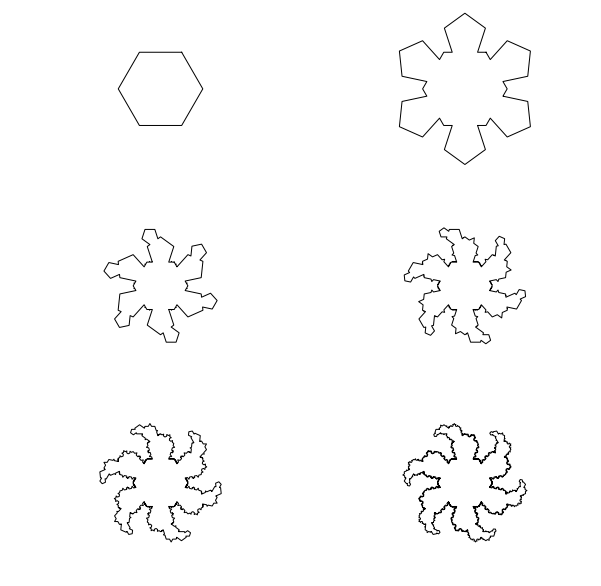

In [19]:
for j in range(6):
    subplot(3,2,1+j)
    draw_spiral_fractal(6, j, plot)
    ylim(xlim([-3, 3]))

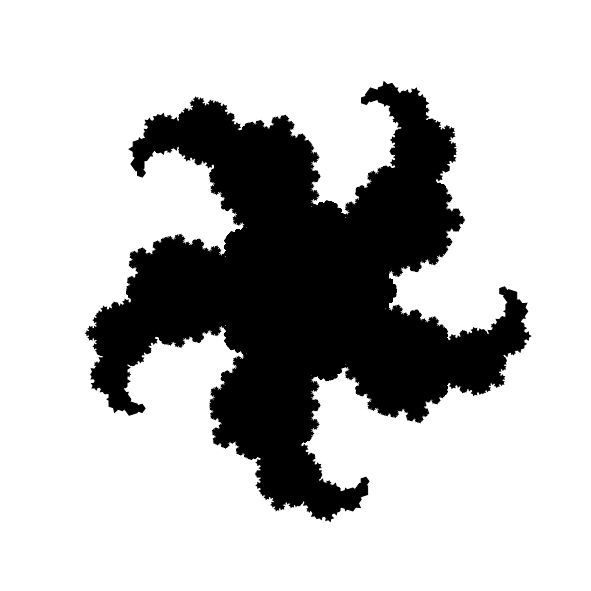

In [20]:
draw_spiral_fractal(5, 6, fill)
ylim(xlim([-3, 3]))
# savefig('pentagon-spiral-6.png', dpi=300, transparent=True)
None